# Intro To Machine Learning

---

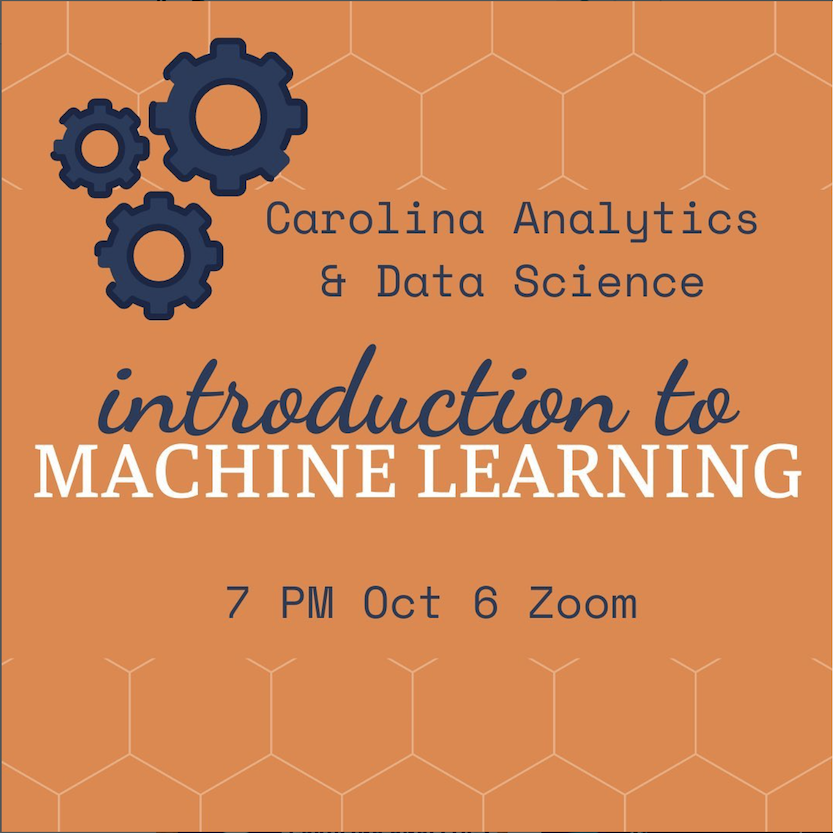

## What is Machine Learning? 

Machine learning refers to the process of using a computer to train a model using historical data so that it can make predicitions on future data. These predicitions are then used to validate our model and to identify which models are better than others. Also, these predicitions relate to the questions we are asking and once we have an accurate model, we can use the predicitions to help answer our questions. 


Below is a flow diagram to help us conceptualize the overall machine learning approach, at a conceptual level. 

![MLProcess.png](https://raw.githubusercontent.com/CarolinaDataScience/Workshops2021/main/Intro%20to%20Machine%20Learning/MLProcess.png)

## Where is Machine Learning Used? 

Machine Learning is used in so many industries and its use is spreading rapidly. Below are some examples of machine learning uses, but these are just examples. Machine Learning is one of the fastest growing tools and is predicted to be a dominating influence in the future. 


![MLExamples](https://whatsthebigdata.files.wordpress.com/2016/07/machine-learning-apps.jpg?w=640)

Machine Learning isnt always the answer though. ML should NOT be used when:
- There isnt enough data. 
- The data is too noisy. 
- Time and money are limiting factors. 
- There are simplier approaches available that would solve the problem. 


## The Machine Learning Pipeline

1. Data Collection
    - Consider what data will be collected, how the data will be stored, and what format the data needs to be in for your analyses (e.g. Are all of the variables relevant to your questions or task?)
<Br></Br>
<Br></Br>
2. Data Preparation
    - This is where you will consider how to process your data to make it more appropriate fvor your analyses. This will also include cleaning the data, handling NAs, and conducting data transformations if needed. And, more in relation to machine learning, you may need to create or exclude features (i.e. variables), check statistical assumptions, and, most likely, split the data into training and test sets. 
<Br></Br>
<Br></Br>
3. Model Training and Validation
    - In this step, identifying the appropriate model, splitting the data into training and testing sets, creating the model, and fine-tuning hyperparameters are all crucial to this step. 
<Br></Br>
<Br></Br>
4. Model Evaluation
    - Checking the model results, identifying if the predictions make sense, checking for overfitting, and establishing how the model can be deployed are all elements of the model evaluation stage. 
<Br></Br>
<Br></Br>
5. Scoring 
    - This is where you determine which model is best and work to modify the model to increase performance and precision. 
<Br></Br>
<Br></Br>
![MLPipeline](https://raw.githubusercontent.com/CarolinaDataScience/Workshops2021/main/Intro%20to%20Machine%20Learning/MLPipeline.png)

## Supervised Learning

Supervised learning refers to models that are developed with data that has known results. With this, the predicted outcomes can be measured against the known values. If the model works well, it can then be deployed on new data to generate predicted values. In this respect, the model is developed in a "supervised" manner. 

#### Examples of Supervised Learning:
  - Classification
      - Logistic Regression
      - k-Nearest Neighbor (kNN)
      - Decision Tree
      - Random Forest
      - Naive Bayes Classifier
      - Support Vector Machine (SVM)
      <Br></Br>
      <Br></Br>
  - Regression
      - Linear Regression
      - Ridge Regression (L2 Regularization)
      - Lasso Regression (L1 Regularization)
      - Support Vector Regression (SVR)
      - kNN Regression
      - Decision Tree Regression



## Unsupervised Learning

Unsupervised learning refers to models that are built without any sort of known outcome values. In this respect, the data is untagged or unlabeled. Models in this class work to find patterns or groupings in the data that were not known nor specified beforehand. Therefore, model development is "unsupervised". 

#### Examples of Unsupervised Learning:
  - Clustering
      - K-means Clustering
      - Fuzzy K-Means Clustering
      - Hierarchical Clustering
      - Gaussian Mixture
      <Br></Br>
      <Br></Br>
  - Dimensionailty Reduction
      - Principal Component Analysis (PCA)
      - Linear Discriminant Analysis (LDA)
      - Kernal PCA
      - t-Distributed Stochastic Neighbor Embedding (t-SNE)

# **Example of a Logistic Regression**

This example comes from Kaggle originally and can be found here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to predict whether or not a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, etc. 

We are going to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes. 

Since this is a classification problem, with a binary outcome (i.e. Diabetes or Not), we can use a **logistic regression**. 



### Loading The Data

In [4]:
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preparation

In [5]:
# Are all of our features numeric? This is a key consideration for our machine-learning task. 
# If not, can we encode them, or should we remove/drop them?
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Are there any duplicated data or rows that need to be dropped?
diabetes.duplicated().sum()

0

In [7]:
# Is there missing data? If so, should we impute or drop features with the missing data?
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Logistic Regression Assumptions


Logistic regression makes the following assumptions:
- The dependent variable is either binary or ordinal depending on whether we are aiming for binary logistic regression or ordinal logisitic regression.
- Each observation, or each row, in the data set should be independent from each other.
- There is little to low multicolinearity present among the independent variables.
- There is linearity of independent variables and log odds, so the independent variables should be linearly related to the log odds.  
    - Linearity between the independent variables and the dependent variable is only assumed for linear regression not logistic regression.
- There is a large sample size.

Due to these assumptions, we may need to normalize or standardize our data. 

The goal of **normalization** is to change numerical values in order to fit within a set common range. Normalization helps when the distribution of our features are not normal, if our features have varying scales, and/or the model doesnt make assumptions about the distribution of the data (as in k-nearest neighbors and neural networks). 

The goal of **standardization** is to be able to compare features with different units by centering the feature with a mean of 0 and a standard deviation of 1. This is useful when our features have varying scales and the algorithm assumes the data's distrubutions

### Checking the Distrubtions of Variables

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


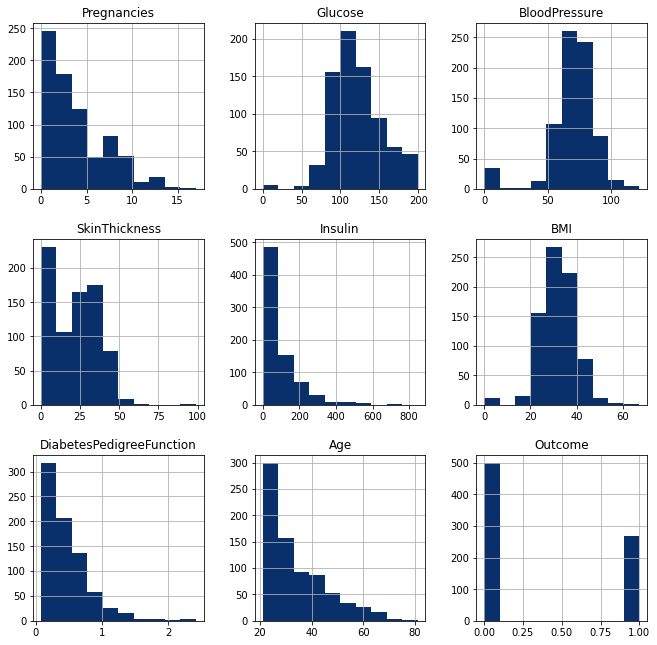

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

diabetes.hist(figsize=(11,11), color ='#09306b')
plt.show()

### Checking Correlations Between Variables

**Why is multicolinearity an issue?**

Logisitic regression relies on several of the same assumptions as linear regression and assumes each variable for "X" is independent and normally distributed. Keeping two features that are colinear will produce unreliable coefficients or bias terms for those features and can cause the model to overfit the data. There are several ways to detect multicolinearity (e.g. VIF, eigenvalues) but we will be using the correlation coefficient or R-values. A strong correlation is likely an indicator that multicolinearity is present.

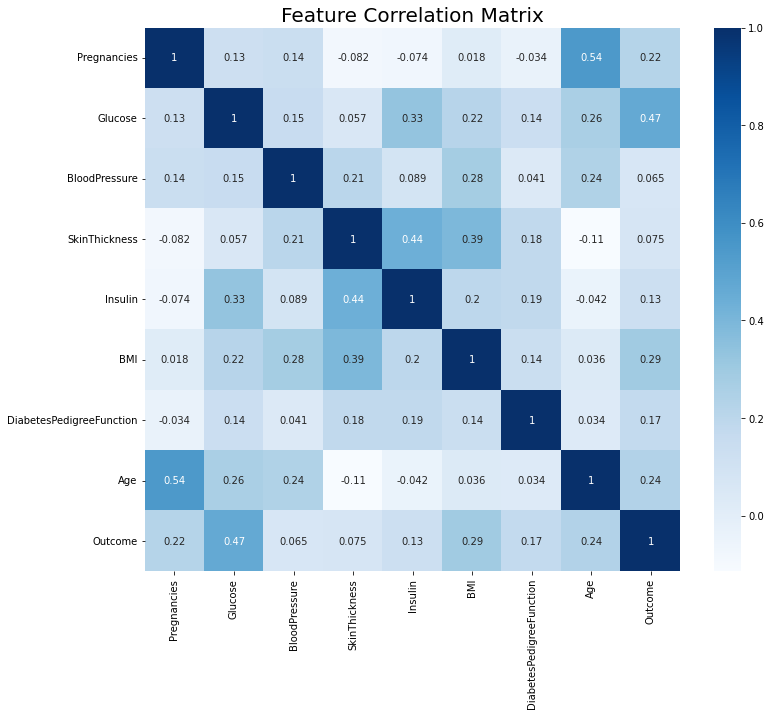

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

### Model Training

Before a model is trained, data sets are typically split into two subsets: the **training data set** and the **testing data set**. The ratio of the split can be 75% training-25% testing, 60% training-40% testing, 80% training-20% testing, or any other ratio that seems suitable based on the size of your data set and what model you are using. You want to use a higher ratio for your training-testing split if the size of your data set is smaller so the model can have as much data as possible. If your data set is not large enough, you can use alternative methods like k-fold cross validation.

The train-test prodedure is commonly used if it becomes costly to repeatedly train your model. Often times, the a validation data set is also created from a subset of the training data set and used to fine tune the model's hyperparameters. Using a validation data set and tuning the hyperparameters is outside the scope of this intro workshop, so we will not be needing this.

The scikit-learn package has a function that randomly splits the data set into training and testing data sets as specified by the train-test ratio. Also, the scikit-learn package has many machine learning models you can use across supervised and unsupervised learning. Here, we will use the package to fit and train a logistic regression model.


In [11]:
# Determining Features to Train the Model. 
diabetes_X = diabetes.drop('Outcome', axis=1)
diabetes_y = diabetes['Outcome']

# Splitting data into test and train datasets. 
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
    train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=42)

In [12]:
# Fitting the training data to the model and adjusting any hyperparameters
from sklearn.linear_model import LogisticRegression
diabetes_model = LogisticRegression() # max_iter=200
diabetes_model.fit(diabetes_X_train, diabetes_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Getting prediction for a row
print(diabetes_X_test[5:6])
print(diabetes_model.predict(diabetes_X_test[5:6]))

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
204            6      103             72  ...  37.7                     0.324   55

[1 rows x 8 columns]
[0]


### Model Evaluation

One way to assess classification tasks is to use a confusion matrix. A confusion matrix shows the model's:
- True positives (top left): the number of positive observations and classified as positive by the model
- True negatives (bottom right): the number of negative observations and classified as negative by the model
- False positives (top right): the number of negative observations that are classified as positive by the model
- False negatives (bottom left): the number of positive observations that are classified as negative by the model

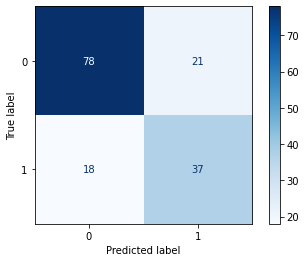

In [15]:
# Examining the model's confusion matrix. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
diabetes_y_hat = diabetes_model.predict(diabetes_X_test)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(diabetes_y_test, diabetes_y_hat),
                            display_labels=diabetes_model.classes_)
cm.plot(cmap="Blues")
plt.show()

Several metrics exist to assess model performance. These metrics can differ depending on the task you are trying to achieve. The common metrics available for classification tasks are:
- Accuracy: 
    - the percentage of observations classified correctly by the model 
    - (true positive + true negative) / total observations
    - use if avoiding both false positives and false negatives
    - is not useful if there are not the same number of positive and negative cases in the data set

- Precision: 
    - the percentage of positive observations classifed correctly as positive by the model
    - true positve / (true positive + false positive)
    - use if avoiding false positives is important

- Recall or sensitivity: 
    - the percentage of observations classified correctly as positive by the model
    - true positive / (true positive + false negative)
    - use if avoiding false negatives is important

- F1-score: 
    - a metric that is a balance between precision and recall 
    - (2 (precision recall) / (precision + recall)
    - use if there is a large number of true negatives and avoiding false positives and false negatives is important

In [ ]:
# Examining common metrics for the model
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(diabetes_y_test, diabetes_y_hat))
print("Precision:", precision_score(diabetes_y_test, diabetes_y_hat))
print("Recall:", recall_score(diabetes_y_test, diabetes_y_hat))

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727


In [ ]:
# Examining the classification report
from sklearn.metrics import classification_report
print(classification_report(diabetes_y_test, diabetes_y_hat))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



The AUC-ROC curve is also a plot that is commonly used to assess classification mdoels. The plot shows the false positive rate on the bottom axis and the true positive rate on the left axis. The ROC is a probability curve and the AUC represents the degree or measure of seperability (i.e. how well the model is capable of distinguishing between classes or at predicting 0s as 0s and 1s as 1s). An AUC of 1 is ideal where an AUC of 0 is poor. An AUC of 0.5 means the model is not able to distinguish between classes whatsoever. We also want the ROC curve to be as close as possible to (0 FPR, 1 TPR).

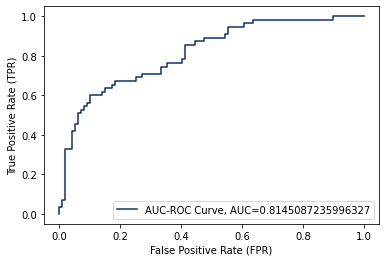

In [ ]:
# Examining the AUC-ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = diabetes_model.predict_proba(diabetes_X_test)[::,1]

fpr, tpr, _ = roc_curve(diabetes_y_test,  y_pred_proba)

auc = roc_auc_score(diabetes_y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC-ROC Curve, AUC=" + str(auc), color ='#09306b')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.show()

# **Example of Linear Regression**

For this example, we will be using some housing data to identify the median house value. For this, we will use a linear regression. This is a supervised approach that uses historical data to create a model that can be used for future predictions. 


### Loading The Data

In [16]:
housing = pd.read_csv("/content/drive/MyDrive/2021-2022 CADS/Tech Chair Workshop Planning /Workshop 3: Intro To ML/housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preparation

In [17]:
# Are all of our features numeric? This is a key consideration for our machine-learning task. 
# If not, can we encode them, or should we remove/drop them?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# Are there any duplicated data or rows that need to be dropped?
housing.duplicated().sum()

0

In [19]:
# Is there missing data? If so, should we impute or drop features with the missing data?
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Linear Regression Assumptions

Linear regression makes the following assumptions:
- The relationship between the independent variables and the dependent variable is linear.
- The independent variables are normally distributed. This can be checked with a histogram or a Q-Q plot. A transformation (e.g. log, or log-log) can fix the issue if a variable/feature is not normally distributed.
- There is little to no multicolinearity present among the independent variables. This can be checked with the correlation matrix.
- There is little to no autocorrelation in the data. Do not worry if you don't know what this means as it is mostly relevant for time-series data and is outside the scope of this workshop.
- The data is homoscedastic, or the residuals (i.e. the error or difference between the actual and predicted value) are cented around a zero mean. This can be checked with a residual plot.

### Checking the Distribution of Variables

In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


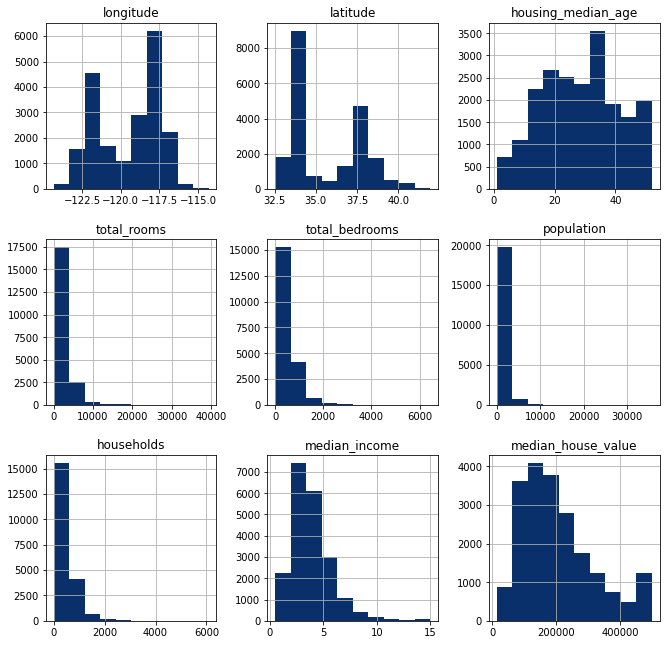

In [22]:
housing.hist(figsize=(11,11), color ='#09306b')
plt.show()

### Checking Correlations


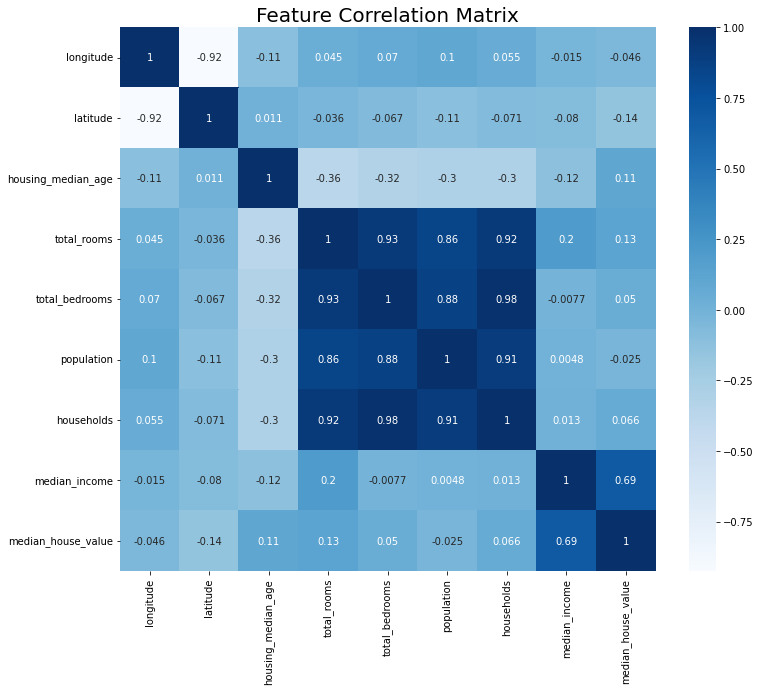

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(housing.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

### Model Training

In [24]:
# Determining features needed to train the model
housing_X = housing.drop(['median_house_value', 'ocean_proximity', 'total_bedrooms'], axis=1)
housing_y = housing['median_house_value']

# Splitting the data into training and test sets
housing_X_train, housing_X_test, housing_y_train, housing_y_test = \
    train_test_split(housing_X, housing_y, test_size=0.25, random_state=42)

In [25]:
# Fitting the model and adjusting hyperparameters
from sklearn.linear_model import LinearRegression
housing_model = LinearRegression()
housing_model.fit(housing_X_train, housing_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(housing_X_test[5:6])
print(housing_model.predict(housing_X_test[5:6]))

       longitude  latitude  ...  households  median_income
13311    -117.61     34.08  ...       843.0         4.7147

[1 rows x 7 columns]
[209903.148141]


### Model Evaluation

The common metrics available for regression tasks are:
- Mean Squared Error (MSE): squared difference between the predicted and actual value

- Mean Absolute Error (MAE): average of the absolute difference between the predicted and actual value

- R-squared: the variance of the dependent variable explained by the independent variables; essentially is the strength of the relationship between the independent variables in your model and the dependent variables

- Adjusted R-squared: the variation explained by only the independent variables that actually affect the dependent variable not by every single independent variable

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
housing_y_hat = housing_model.predict(housing_X_test)
print("MAE: ", mean_absolute_error(housing_y_test, housing_y_hat))
print("MSE: ", mean_squared_error(housing_y_test, housing_y_hat))
print("R2: ", r2_score(housing_y_test, housing_y_hat))

MAE:  51259.69625669663
MSE:  4860305669.470103
R2:  0.6326905102474218


# **Example of K-Means Clustering**

This example comes from Kaggle originally and can be found here: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

This data set is created only for the learning purpose of the customer segmentation concepts, also known as market basket analysis.

We own a supermarket mall and, through membership cards, we have some basic data about our customers including Customer ID, age, gender, annual income, and spending score. Spending Score is something assigned to the customer based on the defined parameters, like customer behavior and purchasing data.

We want to understand the different customer segments that exist and which ones could be potential marketing targets utilizing a machine learning approach. 

In [29]:
import numpy as np
import pandas as pd
customers = pd.read_csv("/content/drive/MyDrive/2021-2022 CADS/Tech Chair Workshop Planning /Workshop 3: Intro To ML/mall_customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preparation


In [30]:
# Are all of our features numeric? This is a key consideration for our machine-learning task. 
# If not, can we encode them, or should we remove/drop them?
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
# Are there any duplicated data or rows that need to be dropped?
customers.duplicated().sum()

0

In [32]:
# Is there missing data? If so, should we impute or drop features with the missing data?
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Checking Distributions

In [33]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


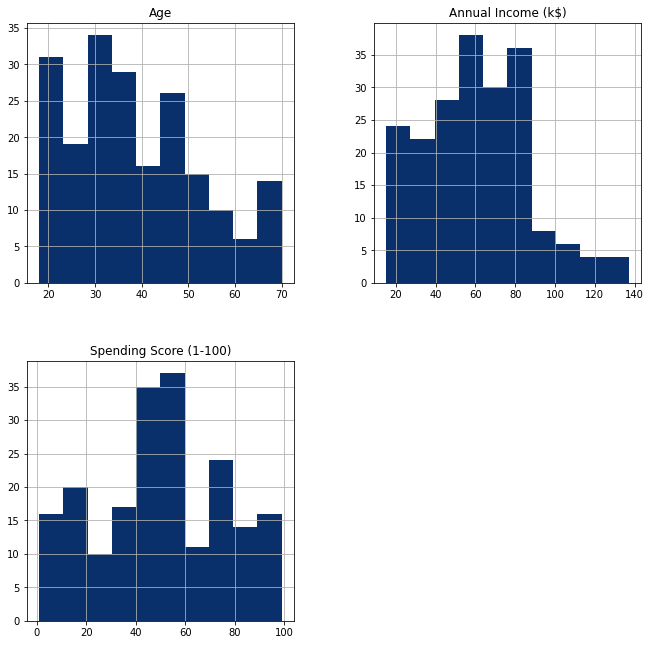

In [34]:
customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(figsize=(11,11), color ='#09306b')
plt.show()

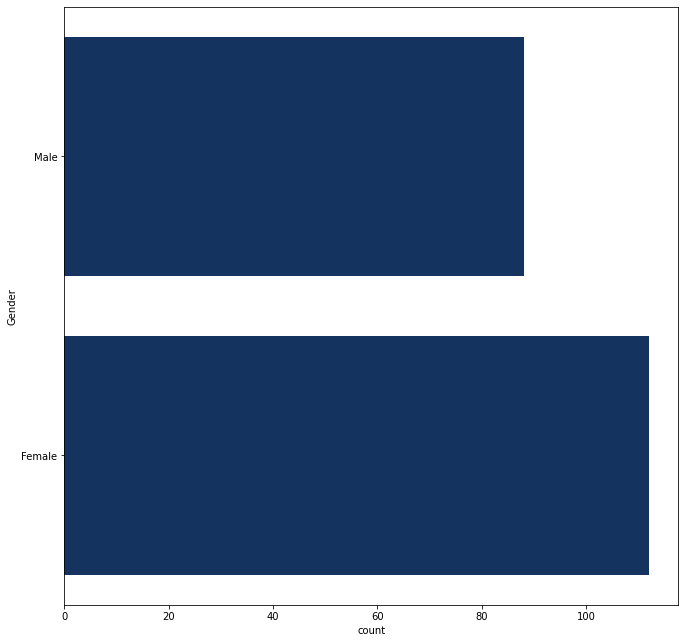

In [35]:
plt.figure(1 , figsize = (11, 11))
sns.countplot(y = 'Gender' , data = customers, color ='#09306b')
plt.show()

### Examining Pairplots

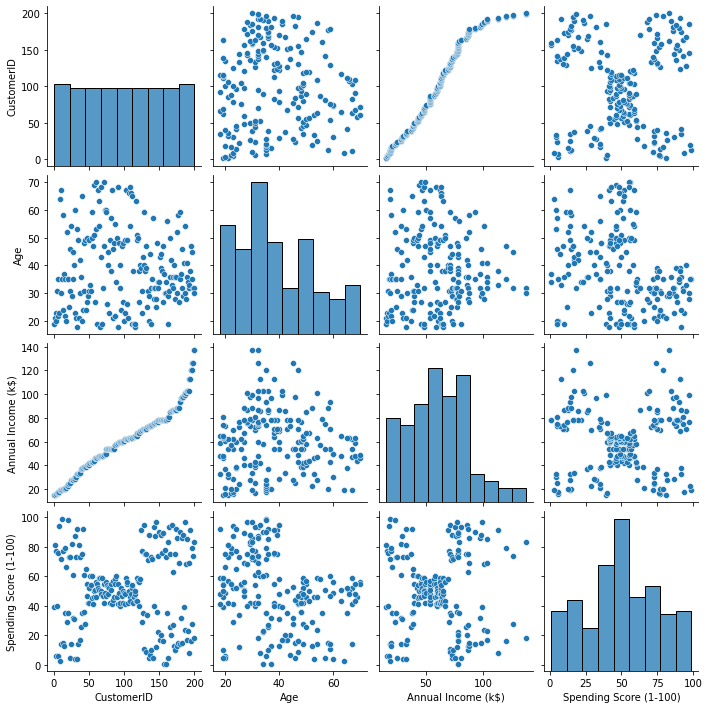

In [41]:
sns.pairplot(customers)
plt.show()

### Checking Correlations

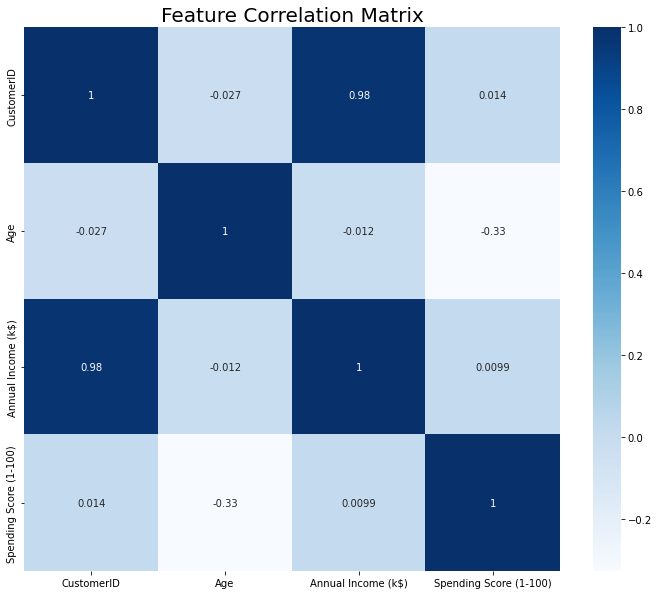

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(customers.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

### Model Training

Here we are going to look at two models. One identifying clusters using age and spending score, and another using income and spending score. 

##### **Segmentation with Age and Spending Score**

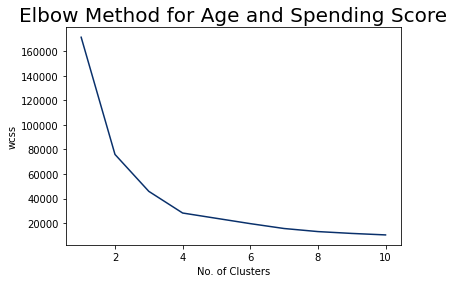

In [43]:
x = customers[['Age' , 'Spending Score (1-100)']].values

# elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, color ='#09306b')
plt.title('Elbow Method for Age and Spending Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [44]:
# fit and train model
age_score_model = KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, random_state = 0)
age_score_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

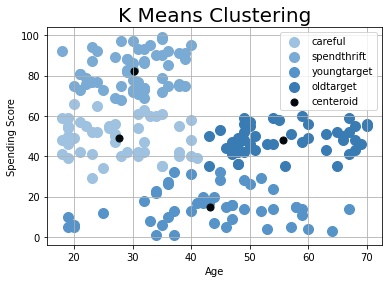

In [46]:
y_means = age_score_model.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = '#9fc2e0', label = 'careful')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = '#7aabd4', label = 'spendthrift')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = '#5593c8', label = 'youngtarget')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = '#397bb3', label = 'oldtarget')
plt.scatter(age_score_model.cluster_centers_[:,0], age_score_model.cluster_centers_[:, 1], s = 50, c = '#03080c' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

##### **Segmentation with Annual Income and Spending Score**

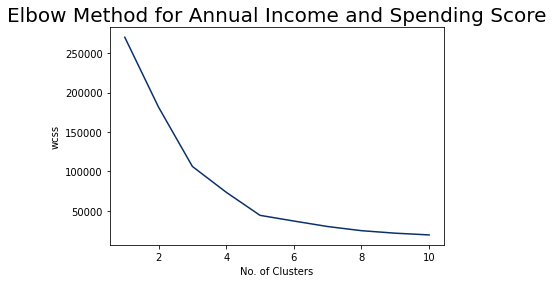

In [47]:
x2 = customers[['Annual Income (k$)', 'Spending Score (1-100)']].values

# elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x2)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, color ='#09306b')
plt.title('Elbow Method for Annual Income and Spending Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [48]:
# fit and train model
income_score_model = KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, random_state = 0)
income_score_model.fit(x2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

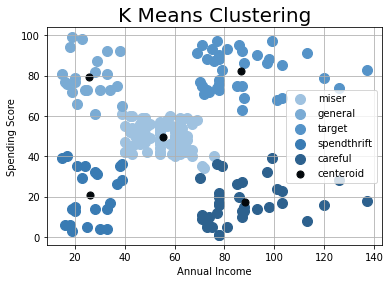

In [49]:
y_means = income_score_model.fit_predict(x2)
plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 100, c = '#9fc2e0', label = 'miser')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 100, c = '#7aabd4', label = 'general')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 100, c = '#5593c8', label = 'target')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 100, c = '#397bb3', label = 'spendthrift')
plt.scatter(x2[y_means == 4, 0], x2[y_means == 4, 1], s = 100, c = '#2d618e', label = 'careful')
plt.scatter(income_score_model.cluster_centers_[:,0], income_score_model.cluster_centers_[:, 1], s = 50, c = '#03080c' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# **Acknowledgments**

Much of this case was originally developed by our previous Technical Chair, **Hamzah Chaudhry**. This workshop is based on his three-part series on machine learning. You can find the original materials here (https://github.com/hybrezz54/data-science) and the original slides here (https://tinyurl.com/cads-ml-intro). 

# **Key Terms**

- **Data Set:** a collection of data typically presented in tabular format
Feature: a column in a data set; a measurable quality
- **Tidy data:** structuring data sets in a standard manner; each row represents a single observation
- **Imputation:** the process of replacing missing data with substituted data
- **Encoding:** process of representing data into a different form; commonly used to represent categorical as numerical data for many models like linear regression and logistic regression
- **Feature scaling:** the processing of preparing data to minimize overfitting; use to increase performance of models (i.e. distance-based and gradient descent-based algorithms) by making the values of features (or range) more similar to each other
- **Standardization:** transform feature values to have zero mean and a variance of 1; make data unitless and features comparable to each other
- **Normalization:** transform feaure values to a range of [0, 1] or [-1, 1]; a.k.a. min-max scaling; useful when data doesn't follow normal distribution
- **Training data set:** the subset of a data set used for training a machine learning model
- **Validation data set:** the subset of the training data set used to tune hyperparameters
- **Testing Data Set:** the subset of a data set used to assess performance on a machine learning model after training
Model parameter: a variable which is used to define a model and can be estimated from the data
- **Model hyperparameter:** a variable which is used to tune a model and cannot be estimated from data (i.e. you have to adjust it yourself)
- **Supervised learning:** a machine learning task where the data set has an experimental or known value the model will predict (i.e. the data set is labeled)
- **Unsupervised learning:** a machine learning task where there is no known value the model will predict for in the data set (i.e. the data set is unlabled or untagged); the model will find patterns or groupings in the data set not specified beforehand
- **Cross Validation:** used to ensure the model is robust and is not overfitted; the most common method is K-fold cross validation where the data set is split into subsets and the model is trained and assessed on those subsets
- **Metric:** values that can be used to make a decision (ie. tell you how well your model is performing and how well it is comparing to other models)
- **Underfitting:** occurs when a model performs poorly on the training and other data
- **Overfitting:** occurs when a model fits and performs really well on the training data but performs poorly on other data

# **Some Resources**

Linear Algebra for Machine Learning: https://towardsdatascience.com/linear-algebra-for-machine-learning-22f1d8aea83c

L1 and L2 Norms and Regularization: https://pub.towardsai.net/l1-and-l2-norms-and-regularization-c50353e6423

K-Nearest Neighbors (KNN) Algorithm Tutorial — Machine Learning Basics: https://pub.towardsai.net/k-nearest-neighbors-knn-algorithm-tutorial-machine-learning-basics-ml-ec6756d3e0ac

Simple Linear Regression Tutorial for Machine Learning (ML): https://pub.towardsai.net/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660

Machine Learning (ML) Algorithms For Beginners with Code Examples in Python: https://towardsai.net/p/machine-learning/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

Checklist for ML Learning Progress: https://towardsdatascience.com/a-checklist-to-track-your-machine-learning-progress-801405f5cf86

Framework for Data Preparation Techniques in Machine Learning: https://machinelearningmastery.com/framework-for-data-preparation-for-machine-learning/

Feature Selection and EDA in Machine Learning: https://towardsdatascience.com/feature-selection-and-eda-in-python-c6c4eb1058a3

Random Forests Algorithm explained with a real-life example and some Python code: https://towardsdatascience.com/random-forests-algorithm-explained-with-a-real-life-example-and-some-python-code-affbfa5a942c

